In [2]:
# importing libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
# Import data
df = pd.read_excel(r'/Users/shirwetelfeel/Desktop/Data analysis /tasks/Data immersion/Achievment 6/Raw data/Furniture Superstore copy.xlsx')
print(df)


                      Order ID Order Date            Ship Date  \
0      AE-2018-EB4110138-41926 2018-10-14  2018-10-14 00:00:00   
1      IN-2017-TS2134092-41219 2017-11-06  2017-11-08 00:00:00   
2      IN-2017-MB1808592-41378 2017-04-14  2017-04-18 00:00:00   
3        AG-2018-CL25653-42164 2018-06-09  2018-06-13 00:00:00   
4     CA-2017-AB10015140-40974 2017-03-06  2017-03-07 00:00:00   
...                        ...        ...                  ...   
7461  ES-2017-BC11125120-41010 2017-04-11  2017-04-15 00:00:00   
7462  ZA-2018-TA11385146-41692 2018-02-22  2018-02-27 00:00:00   
7463  ZA-2018-TA11385146-41692 2018-02-22  2018-02-27 00:00:00   
7464  CA-2017-JA15970140-41224 2017-11-11  2017-11-15 00:00:00   
7465  ZA-2018-TS11205146-42062 2018-02-27  2018-03-03 00:00:00   

           Ship Mode   Customer ID   Customer Name      Segment  \
0           Same Day    EB-4110138  Eugene Barchas     Consumer   
1        First Class    TS-2134092   Toby Swindell     Consumer   
2     

In [5]:
df.shape

(7466, 25)

In [6]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,IsFirstShopping,Rating,Customer Referrals,Complaint
0,AE-2018-EB4110138-41926,2018-10-14,2018-10-14 00:00:00,Same Day,EB-4110138,Eugene Barchas,Consumer,Ras al Khaymah,Ra's Al Khaymah,United Arab Emirates,...,224.748,6,0.7,-232.2720,60.08,High,0,4,18,0
1,IN-2017-TS2134092-41219,2017-11-06,2017-11-08 00:00:00,First Class,TS-2134092,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,...,1822.080,4,0.0,564.8400,894.77,Critical,0,5,0,0
2,IN-2017-MB1808592-41378,2017-04-14,2017-04-18 00:00:00,Standard Class,MB-1808592,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,...,5244.840,6,0.0,996.4800,878.38,High,0,4,0,0
3,AG-2018-CL25653-42164,2018-06-09,2018-06-13 00:00:00,Standard Class,CL-25653,Clay Ludtke,Consumer,Saida,Saida,Algeria,...,516.000,4,0.0,61.9200,46.75,High,0,4,0,0
4,CA-2017-AB10015140-40974,2017-03-06,2017-03-07 00:00:00,First Class,AB-100151404,Aaron Bergman,Consumer,Seattle,Washington,United States,...,48.712,1,0.2,5.4801,11.13,High,1,4,4,0


In [7]:
## create another data with columns include numbers to use it for correlations
sub_1 = df[['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'IsFirstShopping', 'Rating', 'Customer Referrals', 'Complaint']]

In [8]:
# the elbow technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(sub_1).score(sub_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-2912927705.991256,
 -1257278760.8260734,
 -800577580.9998133,
 -628287776.0787355,
 -527303077.2925034,
 -444739469.9256396,
 -382205147.98894274,
 -337437180.3451227,
 -300444448.570319]

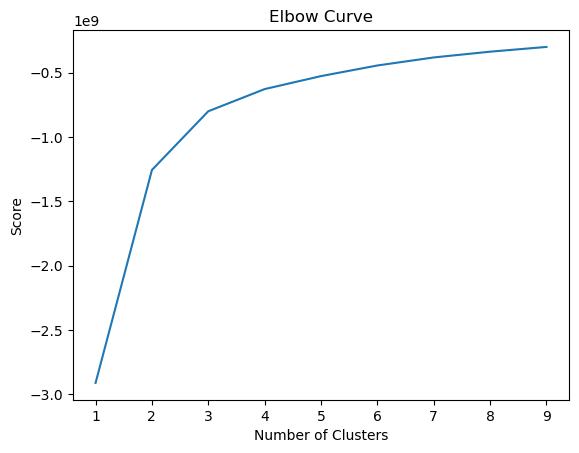

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [11]:
#####  In this example, there's a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(sub_1)

KMeans(n_clusters=5)

In [14]:
sub_1['clusters'] = kmeans.fit_predict(sub_1)
sub_1.head()

/var/folders/3k/xhrfl4jx1k98sdzb7hh3qqbh0000gn/T/ipykernel_29641/1387313415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_1['clusters'] = kmeans.fit_predict(sub_1)


,Sales,Quantity,Discount,Profit,Shipping Cost,IsFirstShopping,Rating,Customer Referrals,Complaint,clusters
0,224.748,6,0.7,-232.2720,60.08,0,4,18,0,2
1,1822.080,4,0.0,564.8400,894.77,0,5,0,0,3
2,5244.840,6,0.0,996.4800,878.38,0,4,0,0,1
3,516.000,4,0.0,61.9200,46.75,0,4,0,0,0
4,48.712,1,0.2,5.4801,11.13,1,4,4,0,2


In [15]:
sub_1['clusters'].value_counts()

2    4882
0    1733
3     510
4     184
1     157
Name: clusters, dtype: int64

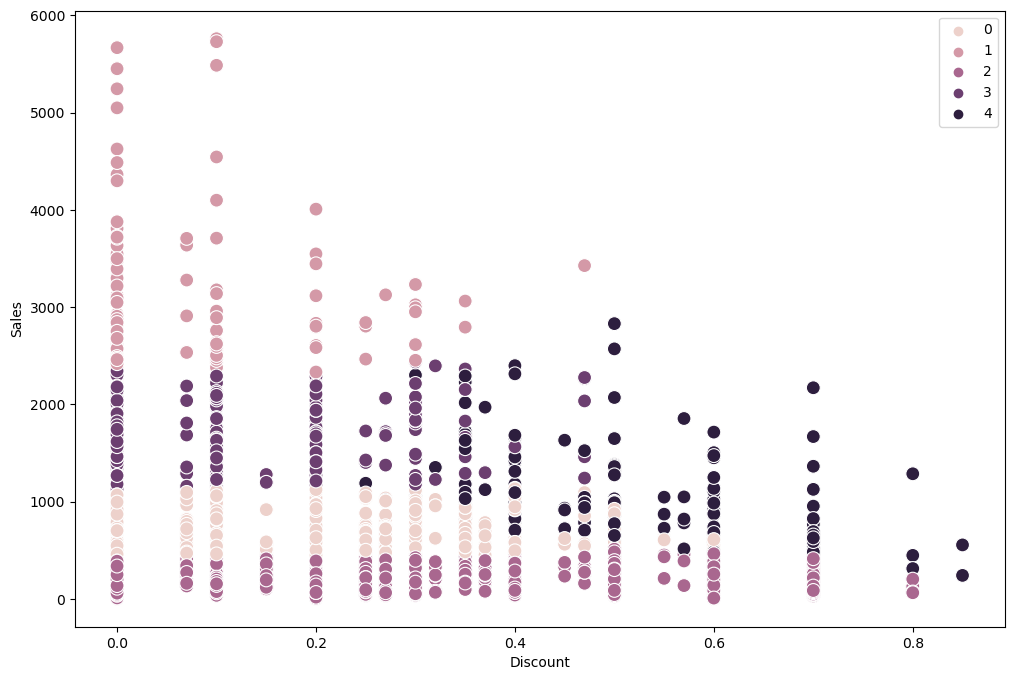

In [16]:
# Plot the clusters for the "Sales" and "Discount" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_1['Discount'], y=sub_1['Sales'], hue=kmeans.labels_, s=100) 
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Discount') # Label x-axis.
plt.ylabel('Sales') # Label y-axis.
plt.show()

In [25]:
plt.savefig('sales vs discount k mean.jpg')

<Figure size 640x480 with 0 Axes>

In [18]:
## the figure above show that the sales are higher when there is no dicount, the higher the discount the lower the sales

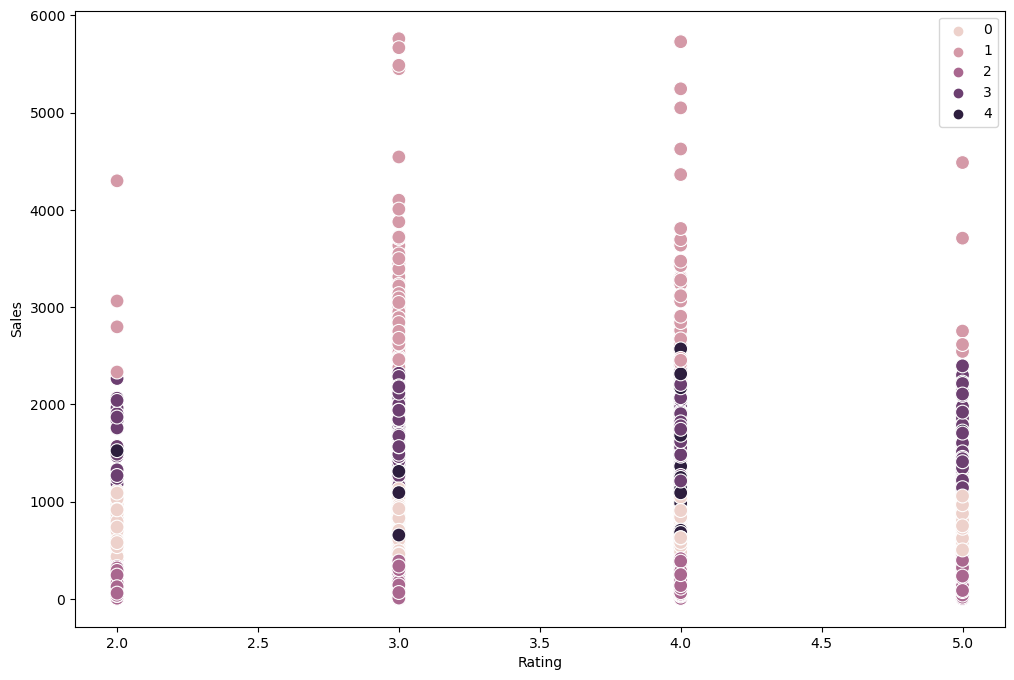

In [19]:
# Plot the clusters for the "Sales" and "Rating" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub_1['Rating'], y=sub_1['Sales'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Rating') 
plt.ylabel('Sales') 
plt.show()

In [20]:
plt.savefig('Sales vs rating k mean.png')

<Figure size 640x480 with 0 Axes>

In [21]:
## it shows that the sales are high in the 4 and 3 rating 

In [22]:
df.loc[sub_1['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[sub_1['clusters'] == 1, 'cluster'] = 'purple'
df.loc[sub_1['clusters'] == 0, 'cluster'] = 'pink'

In [23]:
df.groupby('cluster').agg({'Sales':['mean', 'median'], 
                         'Profit':['mean', 'median'], 
                         'Discount':['mean', 'median'],
                          'Rating':['mean', 'median']})

Sales                Profit             Discount         \
                    mean    median        mean     median      mean median   
cluster                                                                      
dark purple   194.437229   175.770    3.337158   14.88165  0.166311   0.10   
pink          688.790006   660.312   93.813463   99.33600  0.108529   0.07   
purple       3037.852049  2804.580  554.590046  568.26000  0.065669   0.00   

               Rating         
                 mean median  
cluster                       
dark purple  3.431585    3.0  
pink         3.402770    3.0  
purple       3.337580    3.0

In [24]:
### juding the above grouping
#The purple cluster has the best stats in almost all categories. the pink is higher median for discount
# the rating mean is higher in the pink which means rating doesn't effect sales.